## Observations and Insights 

In [242]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on = "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [243]:
#Dropping duplicate rows

#Find duplicate rows indicated by boolean series
dups_bool = combined_data.duplicated(subset=['Mouse ID','Timepoint'])

#Add duplicate boolean series to data frame 
bool_combined_data = combined_data
bool_combined_data["Duplicates"]= dups_bool

#Iterate through 'Duplicates' and find Mouse ID duplicates

dup_mouse_id_index = []

for index in range(0,len(bool_combined_data)):
    if bool_combined_data.loc[index]["Duplicates"] == True:
        dup_mouse_id_index.append(bool_combined_data.loc[index]["Mouse ID"])
    else:
        next

#Get rid of duplicate mice IDs
bad_mice = list(set(dup_mouse_id_index))

#Iterate through data drop bad_mice
clean_data = bool_combined_data
clean_data = clean_data.rename({'Mouse ID' : 'Mouse_ID'}, axis = 1)

for bad_mouse in bad_mice:
    clean_data = clean_data[clean_data.Mouse_ID != bad_mouse]

clean_data = clean_data.drop(columns = "Duplicates")
clean_data


,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [244]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data)
num_mice

1880

## Summary Statistics

In [245]:
# Create Summary Data Frame


#Condense data frame to two columns we are intested in (Drug Regimen and Tumor Volume)
codensed_df = clean_data.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

#Calculate mean, median, standard deviation, and standard error for each drug
summary_df = codensed_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median,np.std, st.sem]})

#Format to 2 decimal places
for header in summary_df:
    summary_df[header]=summary_df[header].apply('{:.2f}'.format)

#Rename df headers   
summary_df = summary_df.rename({'mean':'Mean','median':'Median','std':'Standard_Dev','sem':'Standard_Err'}, axis = 1)
summary_df


Tumor Volume (mm3)                                 
                           Mean Median Standard_Dev Standard_Err
Drug Regimen                                                    
Capomulin                 40.68  41.56         4.99         0.33
Ceftamin                  52.59  51.78         6.27         0.47
Infubinol                 52.88  51.82         6.57         0.49
Ketapril                  55.24  53.70         8.28         0.60
Naftisol                  54.33  52.51         8.13         0.60
Placebo                   54.03  52.29         7.82         0.58
Propriva                  52.32  50.45         6.62         0.54
Ramicane                  40.22  40.67         4.85         0.32
Stelasyn                  54.23  52.43         7.71         0.57
Zoniferol                 53.24  51.82         6.97         0.52

In [246]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [248]:
clean_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [249]:
#Create series of total measurements for each drug 

#Create series of total measurments of each drug
total_meas_series = clean_data['Drug Regimen'].value_counts()

#Identify list of drugs in study and how many measurements as x and y values respectively for bar plot
x_drug_regimen_list = total_meas_series.index.values.tolist()
y_drug_meas_list = total_meas_series.values.tolist()


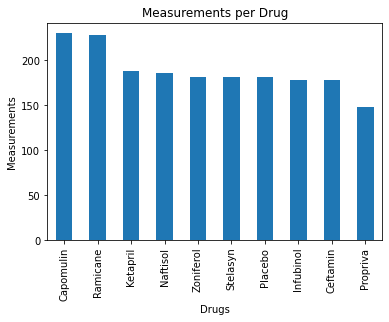

In [250]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using DataFrame.plot.

#Make bar plot with title
drug_meas_graph = total_meas_series.plot(kind = 'bar',title = "Measurements per Drug")

#Change x and y labels
drug_meas_graph.set_xlabel("Drugs")
drug_meas_graph = drug_meas_graph.set_ylabel("Measurements")


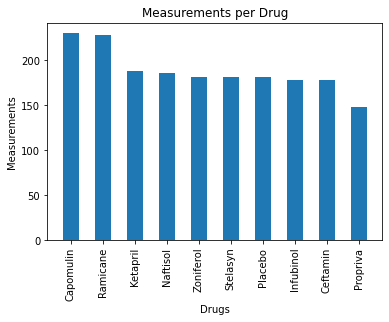

In [251]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Make the bar plot with title and identical width
drug_meas_graph2 = plt.bar(x_drug_regimen_list,y_drug_meas_list,width=.5)

#Rotate the x values 
drug_meas_graph2 = plt.xticks(x_drug_regimen_list,rotation = 'vertical')

#Change x and y labels
drug_meas_graph2 = plt.xlabel('Drugs')
drug_meas_graph2 = plt.ylabel('Measurements')
drug_meas_graph2 = plt.title("Measurements per Drug")

In [252]:
clean_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [253]:
# Determine x and y values for pie chart for female vs male mice

#Count male vs female mice occurrences
mouse_sex_series = clean_data['Sex'].value_counts()

#Separate index and values as x and y variables for pie chart
label_gender_list = mouse_sex_series.index.values.tolist()
gender_count = mouse_sex_series.values.tolist()



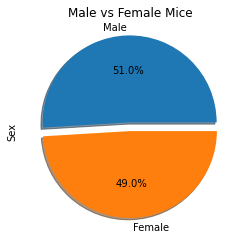

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (.1,0)
mouse_sex_graph = mouse_sex_series.plot(kind="pie",
                                        autopct = '%1.1f%%',
                                        explode = explode,
                                        shadow = True,
                                        title ="Male vs Female Mice")


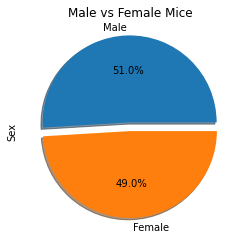

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_sex_graph2 = plt.pie(gender_count,explode=explode,labels = label_gender_list,autopct="%1.1f%%",shadow=True)
mouse_sex_graph2 = plt.ylabel('Sex')
mouse_sex_graph2 = plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [315]:
#Find greatest value of Timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse_ID").max()
max_timepoint = max_timepoint.loc[:,"Timepoint"]

#Create list 
max_timepoint_indices = max_timepoint.index.values

#Iterate through clean data and find Tumor Volume where Mouse ID and greatest Timepoint match
#Results come out to index in clean data we want
max_tumor_index = []
for index in range(0,len(max_timepoint)):   
    index_new = clean_data.loc[(clean_data["Mouse_ID"] == max_timepoint_indices[index]) & (
        clean_data["Timepoint"] == max_timepoint[index]),:].index.values
    max_tumor_index.append(index_new[0])
    
#Pull wanted indices from clean data
mouse_tumor_df = clean_data.loc[max_tumor_index,['Mouse_ID','Timepoint', 'Tumor Volume (mm3)']]

#Merge new table with study results to add drug used
mouse_tumor_df = mouse_tumor_df.merge(mouse_metadata,left_on="Mouse_ID",right_on="Mouse ID")
mouse_tumor_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,a203,Infubinol,Female,20,23
1,a251,45,65.525743,a251,Infubinol,Female,21,25
2,a262,45,70.717621,a262,Placebo,Female,17,29
3,a275,45,62.999356,a275,Ceftamin,Female,20,28
4,a366,30,63.440686,a366,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,z435,Propriva,Female,12,26
244,z578,45,30.638696,z578,Ramicane,Male,11,16
245,z581,45,62.754451,z581,Infubinol,Female,24,25
246,z795,45,65.741070,z795,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
  clean_mouse_metadata = mouse_metadata[mouse_metadata.Mouse_ID != 0]  

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
